# Exploration of Data

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.dataframe_overview import DfOverview
from scripts.dataframe_cleaner import DfCleaner

In [2]:
cleaned_df_store = pd.read_csv('../data/cleaned_store.csv')
cleaned_df_test = pd.read_csv('../data/cleaned_test.csv')
cleaned_df_train = pd.read_csv('../data/cleaned_train.csv')

In [3]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

* Q.1 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
train_data = cleaned_df_train
test_data = cleaned_df_test

In [5]:
def compare(train_data, test_data, feature, title):
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
  ax[0].set_title("Train data" + title)
  sns.countplot(x=feature, data=train_data, ax=ax[0])
  ax[1].set_title("Test data" + title)
  sns.countplot(x=feature, data=test_data, ax=ax[1])
  fig.subplots_adjust(wspace=0.5)
  fig.show()

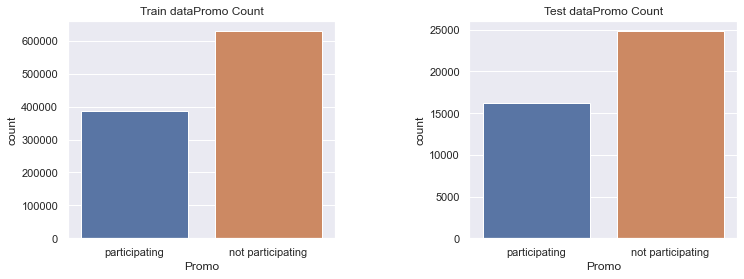

In [6]:
prom = ["not participating", "participating"]
train_data["Promo"] = train_data["Promo"].apply(lambda x: prom[x])
test_data["Promo"] = test_data["Promo"].apply(lambda x: prom[x])
compare(train_data, test_data, 'Promo', "Promo Count")

The distribution is just the same for the training and test data between not participating = 0 and participating = 1 for promotins

* Q.2 Check & compare sales behavior before, during and after holidays
    We have mainly three holidays state holiday(divided into many inside it weekend, easter,...) and school holiday.

In [7]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]
s_h_train = train_data.groupby(['StateHoliday']).agg({'Sales':'mean'})
s_h_train.columns = ['Sales']
s_h_train = s_h_train.reset_index()
s_h_train["StateHoliday"] = s_h_train["StateHoliday"].apply(lambda x: state_holidays[x])
s_h_train

,StateHoliday,Sales
0,Normal day,5947.48
1,Public holiday,290.74
2,Easter holiday,214.31
3,Christmas,168.73


In [8]:
df_train_store = pd.merge(cleaned_df_train.reset_index(), cleaned_df_store, how='inner', on='Store')
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   index                      1017209 non-null  int64 
 1   Unnamed: 0_x               1017209 non-null  int64 
 2   Store                      1017209 non-null  int64 
 3   DayOfWeek                  1017209 non-null  int64 
 4   Date                       1017209 non-null  object
 5   Sales                      1017209 non-null  int64 
 6   Customers                  1017209 non-null  int64 
 7   Open                       1017209 non-null  int64 
 8   Promo                      1017209 non-null  object
 9   StateHoliday               1017209 non-null  int64 
 10  SchoolHoliday              1017209 non-null  int64 
 11  Unnamed: 0_y               1017209 non-null  int64 
 12  StoreType                  1017209 non-null  int64 
 13  Assortment                 

In [9]:
df_train_store['Date'] = pd.DatetimeIndex(df_train_store['Date'])
df_train_store['Year'] = pd.DatetimeIndex(df_train_store['Date']).year
df_train_store['Month'] = pd.DatetimeIndex(df_train_store['Date']).month
df_train_store['Day'] = pd.DatetimeIndex(df_train_store['Date']).day
df_train_store['Year'].min()
df_train_store['Year'].max()

2015

We can see the range of the years for this data is between 2013-2015

In [10]:
df_t_s = df_train_store.drop(df_train_store.columns[1], axis=1)

In [11]:
df_t_s = df_t_s.drop(df_t_s.columns[10], axis=1)

In [12]:
df_t_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   index                      1017209 non-null  int64         
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Date                       1017209 non-null  datetime64[ns]
 4   Sales                      1017209 non-null  int64         
 5   Customers                  1017209 non-null  int64         
 6   Open                       1017209 non-null  int64         
 7   Promo                      1017209 non-null  object        
 8   StateHoliday               1017209 non-null  int64         
 9   SchoolHoliday              1017209 non-null  int64         
 10  StoreType                  1017209 non-null  int64         
 11  Assortment                 1017209 no

In [13]:
df_t_s.describe()

,index,Store,DayOfWeek,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3,Year,Month,Day
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,508604.00,558.43,4.00,5773.82,633.15,0.83,0.05,0.18,1.21,0.94,5422.02,5.24,2002.75,0.50,11.65,1007.01,0.81,2.31,3.81,5.31,2013.83,5.85,15.70
std,293643.09,321.91,2.00,3849.93,464.41,0.38,0.28,0.38,1.37,0.99,7706.92,3.93,10.01,0.50,15.32,1005.88,0.98,2.37,3.85,5.34,0.78,3.33,8.79
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00
25%,254302.00,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,710.00,1.00,1990.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,3.00,8.00
50%,508604.00,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,2325.00,4.00,2006.00,1.00,1.00,2009.00,1.00,4.00,7.00,10.00,2014.00,6.00,16.00
75%,762906.00,838.00,6.00,7856.00,837.00,1.00,0.00,0.00,3.00,2.00,6880.00,9.00,2011.00,1.00,22.00,2012.00,1.00,4.00,7.00,10.00,2014.00,8.00,23.00
max,1017208.00,1115.00,7.00,41551.00,7388.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00,3.00,6.00,9.00,12.00,2015.00,12.00,31.00


In [14]:
stores_types = ["a", "b", "c", "d"]
df_t_s["StoreType"] = df_t_s["StoreType"].apply(lambda x: stores_types[x])
store_type = df_t_s.groupby('StoreType').agg({'Customers': 'mean', 'Sales': 'mean'})
store_type = store_type.reset_index()
store_type

,StoreType,Customers,Sales
0,a,659.03,5738.18
1,b,1987.72,10058.84
2,c,673.27,5723.63
3,d,501.43,5641.82


In [15]:
def plot_trend(df_t_s, columns, feature, title, x_label="", y_label="", labels=['']):
  plt.figure(figsize=(18, 6))
  for i in range(len(columns)):
    sns.lineplot(x=df_t_s.index, y=df_t_s[columns[i]][feature], label=labels[i])
  plt.show()

In [19]:
monthly_trend = df_t_s.groupby(['Month', 'StoreType']).agg( {'Customers': 'mean', 'Sales': 'mean'})
monthly_trend = monthly_trend.unstack().swaplevel(0, 1, 1).sort_index(1)

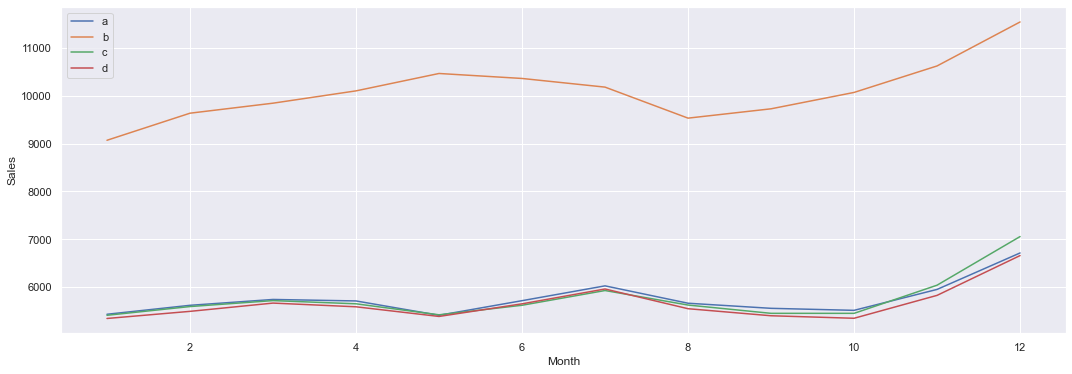

In [20]:
columns = ["a", "b", "c", "d"]
plot_trend(monthly_trend, columns, 'Sales', 'Average Monthly sales', labels=columns)